COCO数据集的

# 导入包,载入annotiation文件

## 目录约定
coco数据集有不同的版本,为了管理起来方便,先约定一下目录结构
- 每个coco版本为一个目录,目录名是coco{版本},比如coco2014, 用变量coco_root 表示
- coco_root 下分为 annotations , train{版本}, val{版本} 3个目录

## 定义coco_root,读取标记

In [82]:
from pycocotools.coco import COCO

In [90]:
# 给出 标记文件的路径
coco_ver = 2014
coco_root = f'/home/gang/dataset/coco/coco{coco_ver}/'
print(coco_root)
annFile = coco_root + f"""annotations/instances_train{coco_ver}.json"""
print(annFile)

/home/gang/dataset/coco/coco2014/
/home/gang/dataset/coco/coco2014/annotations/instances_train2014.json


In [91]:
# 载入 jason文件
coco=COCO(annFile)

loading annotations into memory...
Done (t=6.14s)
creating index...
index created!


# 获取想要分类的信息

In [92]:
# 利用getCatIds函数获取某个类别对应的ID，
# 这个函数可以实现更复杂的功能，请参考官方文档
ids = coco.getCatIds('cell phone')
id_cell_phone = ids[0]

In [93]:
# 根据 id 获取类名称,
# loadCats 可以传入类列表,获取多个类,也可以只传入一个int,只获取一个类
cats = coco.loadCats(id_cell_phone) # id_cell_phone 是77
print(f'"1" 对应的类别名称: {cats}')

"1" 对应的类别名称: [{'supercategory': 'electronic', 'id': 77, 'name': 'cell phone'}]


In [94]:
# 获取满足输入条件的imgID
# 这个是同时包含77,1 的图片
imgIds = coco.getImgIds(catIds = [77,1])
print(len(imgIds))

# 这个是只包含 1 的图片
imgIds_1 = coco.getImgIds(catIds = [1])
print(len(imgIds_1))

# 这个是只包含 77 的图片
imgIds_77 = coco.getImgIds(catIds = [77])
print(len(imgIds_77))

# 这个是包含1 或 77 的图片
imgIds_un = list(set(imgIds_1) | set(imgIds_77))
print(len(imgIds_un))

# 长度应该等于len(imgIds_77) + len(imgIds_1) - len(imgIds)
print()



2661
45174
3322
45835



## 根据id获取包含这个id的所有图片序号
coco.catToImgs 保存了 id->图片id[]


In [95]:
id = coco.getCatIds(['cell phone'])[0]
imgIds = coco.catToImgs[id]
print(f'包含cell phone的图片共有：{len(imgIds)}张, 分别是：')
print(imgIds)

包含cell phone的图片共有：4460张, 分别是：
[324823, 150148, 251849, 479358, 127750, 533706, 230844, 185818, 363243, 143781, 9712, 287958, 237054, 390073, 438867, 524056, 265506, 357456, 490087, 91307, 87017, 86655, 85019, 416281, 141101, 346462, 334596, 358539, 405991, 539072, 540765, 575461, 139617, 278425, 345020, 294639, 155090, 288506, 17468, 196611, 152273, 136092, 135676, 427308, 509054, 246528, 336390, 478778, 5140, 36046, 400045, 323397, 553975, 542638, 313809, 500152, 573297, 85322, 22536, 430338, 580104, 86581, 356187, 442666, 391876, 217276, 146235, 128113, 71138, 190839, 474668, 403291, 81463, 407400, 122631, 81868, 51302, 359470, 517911, 391509, 121782, 259629, 286328, 24307, 455853, 24149, 542027, 492096, 335525, 495149, 476679, 309728, 337779, 332578, 131589, 283809, 570474, 325681, 129079, 573714, 360779, 143959, 177085, 234100, 230133, 215254, 380239, 293520, 181343, 541313, 179526, 251496, 305501, 343225, 26939, 384346, 164572, 341226, 117230, 107175, 425669, 118413, 347755, 29062

## 读取图片

file_name是在trainxxxx目录下的文件名.在读取的时候要首先加上trainxxxx目录的路径

图像287958的信息如下：
{'license': 2, 'file_name': 'COCO_train2014_000000287958.jpg', 'coco_url': 'http://mscoco.org/images/287958', 'height': 480, 'width': 640, 'date_captured': '2013-11-17 15:55:03', 'flickr_url': 'http://farm2.staticflickr.com/1110/1167381742_a1e4ee6f89_z.jpg', 'id': 287958}
/home/gang/dataset/coco/coco2014/train2014/COCO_train2014_000000287958.jpg


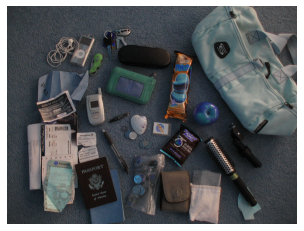

In [96]:
import cv2
import os
import matplotlib.pyplot as plt
imgId = imgIds[11] # 获取之前得到的带有手机的图片列表中的第20张图片id
img_root = coco_root+f"""train{coco_ver}/"""
imgInfo = coco.loadImgs(imgId)[0]
print(f'图像{imgId}的信息如下：\n{imgInfo}')

imPath = os.path.join(img_root,  imgInfo['file_name'])       
print(imPath)
im = cv2.imread(imPath)
plt.axis('off')
plt.imshow(im)
plt.show()

## 获取图片中的annotation
- bbox 的格式是 x,y,w,h
- bbox 没有归一化

图像287958包含3个ann对象，分别是:
[321447, 1047191, 1177743]
{'segmentation': [[181.94, 258.38, 175.74, 218.43, 175.44, 197.98, 203.0, 192.41, 200.84, 180.94, 206.41, 177.23, 210.13, 199.53, 207.03, 200.77, 211.37, 209.75, 215.7, 248.78, 214.16, 256.53, 209.51, 258.69, 196.81, 264.27, 190.3, 264.27, 182.25, 256.84]], 'area': 2408.3541499999988, 'iscrowd': 0, 'image_id': 287958, 'bbox': [175.44, 177.23, 40.26, 87.04], 'category_id': 77, 'id': 321447}


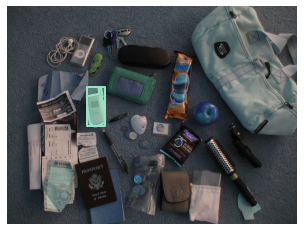

In [97]:
# 获取该图像对应的anns的Id

annIds = coco.getAnnIds(imgIds=imgInfo['id'])
anns = coco.loadAnns(annIds)
print(f'图像{imgInfo["id"]}包含{len(anns)}个ann对象，分别是:\n{annIds}')
# ann 是个字典,对我们有用的信息是 category_id 和 bbox
# 我们把关注的手机的标签提取出来
interested_categery
interested_anns = [ann for ann in anns if ann['category_id'] == id_cell_phone]
print(interested_anns[0])
plt.imshow(im); plt.axis('off')
# coco.showAnns(anns)
coco.showAnns(interested_anns,draw_bbox=True)


# 转换为YOLO标签

- yolo 标签的格式是 
object-class x_center y_center width height
  - object-class - integer object number from 0 to (classes-1)
  - x_center y_center width height - float values relative to width and height of image, it can be equal from (0.0 to 1.0]
  

In [98]:
def annotation_coco_to_yolo(coco_ann,imgInfo = None,category_id_map=None):
    
    # coco bbox: top_left(x,y) (w,h)
    bbx_coco = coco_ann['bbox']
    bbx_coco_w = bbx_coco[2]
    bbx_coco_h = bbx_coco[3]
    bbx_center_x = bbx_coco[0] +  bbx_coco_w / 2
    bbx_center_y = bbx_coco[1] +  bbx_coco_h / 2
    
    imgId = coco_ann['image_id']
    category_id = coco_ann['category_id']
    
    # 把 coco category_id 映射成自定义数据集的 category_id
    if category_id_map:
        category_id = category_id_map[category_id]
        
    # 出于性能考虑,优先已经准备好的imgInfo
    if imgInfo is None:
        imgInfo = coco.loadImgs(imgId)[0]
        
    height = imgInfo['height']
    width = imgInfo['width']
    file_name = imgInfo['file_name']
    
    yolo_x = bbx_center_x / width
    yolo_y = bbx_center_y / height
    yolo_w = bbx_coco_w / width
    yolo_h = bbx_coco_h / height
    
    return (category_id, yolo_x, yolo_y, yolo_w, yolo_h,file_name)

yolo_labels = []
category_id, yolo_x, yolo_y, yolo_w, yolo_h, file_name = annotation_coco_to_yolo(interested_anns[0])
yolo_labels.append(f"""{category_id} {yolo_x} {yolo_y} {yolo_w} {yolo_h}""")
print(yolo_labels, file_name)

    


['77 0.305578125 0.45989583333333334 0.06290625 0.18133333333333335'] COCO_train2014_000000287958.jpg
